In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

In [2]:
url = 'https://raw.githubusercontent.com/riya-dhama19/LetsUpgrade-AI-ML/master/Day%2027/train.csv'

In [3]:
df = pd.read_csv(url)

In [4]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
df.drop(['PassengerId','Name','Ticket'],axis=1,inplace=True)

In [6]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,0,3,male,22.0,1,0,7.2500,NaN,S
1,1,1,female,38.0,1,0,71.2833,C85,C
2,1,3,female,26.0,0,0,7.9250,NaN,S
3,1,1,female,35.0,1,0,53.1000,C123,S
4,0,3,male,35.0,0,0,8.0500,NaN,S


In [7]:
df.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Cabin       687
Embarked      2
dtype: int64

In [8]:
df.shape

(891, 9)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       714 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Cabin     204 non-null    object 
 8   Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(3)
memory usage: 62.8+ KB


<AxesSubplot:>

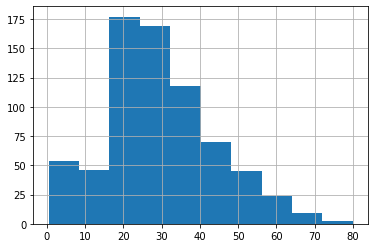

In [10]:
df['Age'].hist()

In [11]:
df['Age'].fillna(df['Age'].median(),inplace=True)

In [12]:
df.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age           0
SibSp         0
Parch         0
Fare          0
Cabin       687
Embarked      2
dtype: int64

In [13]:
df['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [14]:
df["Embarked"].fillna(value='S',inplace=True)

In [15]:
df=df.drop(['Cabin'],axis=1)

In [16]:
df.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

# Label Encoding

In [17]:
from sklearn import preprocessing
le=preprocessing.LabelEncoder()

In [18]:
df["Sex"] = le.fit_transform(df["Sex"])
df["Embarked"] = le.fit_transform(df["Embarked"])

In [19]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.0,1,0,7.2500,2
1,1,1,0,38.0,1,0,71.2833,0
2,1,3,0,26.0,0,0,7.9250,2
3,1,1,0,35.0,1,0,53.1000,2
4,0,3,1,35.0,0,0,8.0500,2


 # creating model 

In [20]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split


In [21]:

def function(n):
    x = df.drop(['Pclass'],axis=1)
    y = df['Pclass']
    k_value= []
    accuracy_score = []
    
    for i in range(1,n):
        model = KNeighborsClassifier(n_neighbors = i)
        k_value.append(i)
        
        
        print(f" here k_value is {i}: ")
    
        x_train, x_test, y_train, y_test = train_test_split(x, y, test_size =0.2, random_state=0)
        model.fit(x_train,y_train)
        y_pred = model.predict(x_test)
        
        score = model.score(x_test,y_test)
        accuracy_score.append(score)
    
        print(f"\nAcuuracy when k is {i} ", score)
        print(f"Confusion matrix when k is {i}  \n", confusion_matrix(y_test, y_pred))
        
    plt.plot(k_value,accuracy_score)
    plt.xlabel("K value")
    plt.ylabel("Accuracy score")
    plt.title("Graph between k_value of knn and Accuracy score")
    plt.show()

How many times do you want to iterate200
 here k_value is 1: 

Acuuracy when k is 1  0.8659217877094972
Confusion matrix when k is 1  
 [[41  5  0]
 [ 4 28  6]
 [ 2  7 86]]
 here k_value is 2: 

Acuuracy when k is 2  0.8491620111731844
Confusion matrix when k is 2  
 [[43  3  0]
 [ 6 29  3]
 [ 4 11 80]]
 here k_value is 3: 

Acuuracy when k is 3  0.888268156424581
Confusion matrix when k is 3  
 [[42  4  0]
 [ 5 28  5]
 [ 2  4 89]]
 here k_value is 4: 

Acuuracy when k is 4  0.8770949720670391
Confusion matrix when k is 4  
 [[44  2  0]
 [ 7 26  5]
 [ 2  6 87]]
 here k_value is 5: 

Acuuracy when k is 5  0.8715083798882681
Confusion matrix when k is 5  
 [[44  2  0]
 [ 7 24  7]
 [ 2  5 88]]
 here k_value is 6: 

Acuuracy when k is 6  0.8603351955307262
Confusion matrix when k is 6  
 [[44  2  0]
 [10 24  4]
 [ 3  6 86]]
 here k_value is 7: 

Acuuracy when k is 7  0.8435754189944135
Confusion matrix when k is 7  
 [[42  3  1]
 [10 20  8]
 [ 1  5 89]]
 here k_value is 8: 

Acuuracy when 

Confusion matrix when k is 63  
 [[36  7  3]
 [ 4  8 26]
 [ 3  2 90]]
 here k_value is 64: 

Acuuracy when k is 64  0.7486033519553073
Confusion matrix when k is 64  
 [[37  6  3]
 [ 4  8 26]
 [ 3  3 89]]
 here k_value is 65: 

Acuuracy when k is 65  0.7541899441340782
Confusion matrix when k is 65  
 [[37  6  3]
 [ 3  9 26]
 [ 3  3 89]]
 here k_value is 66: 

Acuuracy when k is 66  0.7430167597765364
Confusion matrix when k is 66  
 [[37  6  3]
 [ 4  8 26]
 [ 3  4 88]]
 here k_value is 67: 

Acuuracy when k is 67  0.7318435754189944
Confusion matrix when k is 67  
 [[36  7  3]
 [ 2  8 28]
 [ 6  2 87]]
 here k_value is 68: 

Acuuracy when k is 68  0.7430167597765364
Confusion matrix when k is 68  
 [[37  6  3]
 [ 1  9 28]
 [ 6  2 87]]
 here k_value is 69: 

Acuuracy when k is 69  0.7374301675977654
Confusion matrix when k is 69  
 [[37  6  3]
 [ 2  8 28]
 [ 6  2 87]]
 here k_value is 70: 

Acuuracy when k is 70  0.7374301675977654
Confusion matrix when k is 70  
 [[37  6  3]
 [ 2  8 28


Acuuracy when k is 126  0.7150837988826816
Confusion matrix when k is 126  
 [[32  5  9]
 [ 1  6 31]
 [ 4  1 90]]
 here k_value is 127: 

Acuuracy when k is 127  0.7094972067039106
Confusion matrix when k is 127  
 [[32  5  9]
 [ 1  6 31]
 [ 4  2 89]]
 here k_value is 128: 

Acuuracy when k is 128  0.7150837988826816
Confusion matrix when k is 128  
 [[32  5  9]
 [ 1  6 31]
 [ 3  2 90]]
 here k_value is 129: 

Acuuracy when k is 129  0.7150837988826816
Confusion matrix when k is 129  
 [[32  6  8]
 [ 1  6 31]
 [ 3  2 90]]
 here k_value is 130: 

Acuuracy when k is 130  0.7150837988826816
Confusion matrix when k is 130  
 [[32  5  9]
 [ 1  6 31]
 [ 3  2 90]]
 here k_value is 131: 

Acuuracy when k is 131  0.7150837988826816
Confusion matrix when k is 131  
 [[32  4 10]
 [ 1  6 31]
 [ 3  2 90]]
 here k_value is 132: 

Acuuracy when k is 132  0.7150837988826816
Confusion matrix when k is 132  
 [[32  5  9]
 [ 1  6 31]
 [ 3  2 90]]
 here k_value is 133: 

Acuuracy when k is 133  0.7150837

Confusion matrix when k is 187  
 [[30  7  9]
 [ 1  6 31]
 [ 3  3 89]]
 here k_value is 188: 

Acuuracy when k is 188  0.6983240223463687
Confusion matrix when k is 188  
 [[30  7  9]
 [ 1  6 31]
 [ 3  3 89]]
 here k_value is 189: 

Acuuracy when k is 189  0.7039106145251397
Confusion matrix when k is 189  
 [[30  6 10]
 [ 1  6 31]
 [ 3  2 90]]
 here k_value is 190: 

Acuuracy when k is 190  0.6927374301675978
Confusion matrix when k is 190  
 [[30  5 11]
 [ 1  4 33]
 [ 3  2 90]]
 here k_value is 191: 

Acuuracy when k is 191  0.6927374301675978
Confusion matrix when k is 191  
 [[30  5 11]
 [ 1  4 33]
 [ 3  2 90]]
 here k_value is 192: 

Acuuracy when k is 192  0.6927374301675978
Confusion matrix when k is 192  
 [[30  5 11]
 [ 1  4 33]
 [ 3  2 90]]
 here k_value is 193: 

Acuuracy when k is 193  0.6927374301675978
Confusion matrix when k is 193  
 [[30  5 11]
 [ 1  4 33]
 [ 3  2 90]]
 here k_value is 194: 

Acuuracy when k is 194  0.6871508379888268
Confusion matrix when k is 194  
 

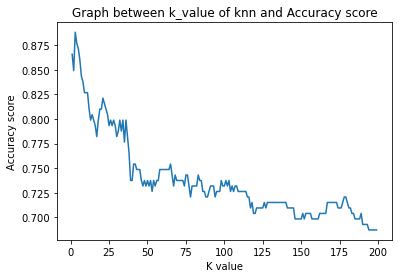

In [22]:
n = int(input('How many times do you want to iterate'))
function(n)

# finding the k_value using elbow method

In [24]:
x = df.drop(['Pclass'],axis=1)
y = df['Pclass']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size =0.2, random_state=0)
k = range(1,268,2)
def elbow(k):
    test_error=[]
    for i in k:
        clf=KNeighborsClassifier(n_neighbors=i)
        clf.fit(x_train,y_train)
        y_pred=clf.predict(x_test)
        score=accuracy_score(y_pred,y_test)
        error=1-score
        test_error.append(error)
    return test_error      
li=elbow(k)

In [25]:
li

[0.13407821229050276,
 0.11173184357541899,
 0.12849162011173187,
 0.15642458100558654,
 0.17318435754189943,
 0.17318435754189943,
 0.2011173184357542,
 0.2011173184357542,
 0.2178770949720671,
 0.1899441340782123,
 0.17877094972067042,
 0.1899441340782123,
 0.2067039106145251,
 0.2067039106145251,
 0.2067039106145251,
 0.2122905027932961,
 0.2122905027932961,
 0.22346368715083798,
 0.2178770949720671,
 0.26256983240223464,
 0.24581005586592175,
 0.25139664804469275,
 0.25139664804469275,
 0.26815642458100564,
 0.26815642458100564,
 0.26815642458100564,
 0.2737430167597765,
 0.26815642458100564,
 0.26256983240223464,
 0.25139664804469275,
 0.25139664804469275,
 0.25139664804469275,
 0.24581005586592175,
 0.26815642458100564,
 0.26256983240223464,
 0.26256983240223464,
 0.26256983240223464,
 0.25698324022346364,
 0.26815642458100564,
 0.26815642458100564,
 0.26815642458100564,
 0.25698324022346364,
 0.26256983240223464,
 0.2737430167597765,
 0.2793296089385475,
 0.26815642458100564,
 0

Text(0.5, 1.0, 'Elbow Curve for test')

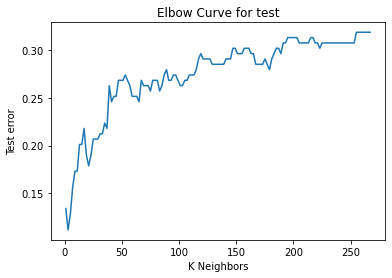

In [26]:
plt.plot(k,li)
# plotting the Curves
plt.xlabel('K Neighbors')
plt.ylabel('Test error')
plt.title('Elbow Curve for test')

#  so by elbow method  best k_value is 3